# Cap. 8 - Scipy

Scipy é um módulo que fornece funcionalidades mais específicas do aquelas do numpy. Entre essa funcionalidades, temos:

- constantes físicas;
- cálculo de funções especiais que surgem no contexto de problemas físicos;
- métodos para otimização de funções;
- integração numérica;
- solução de equações diferenciais;
- interpolação de dados;
- manipulação de imagens.

Tais como as funções do numpy, a maioria dos algoritmos implementados no scipy estão escritos em C, o que os torna rápidos.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Constantes físicas

O submódulo `scipy.constants` disponibiliza os valores de constantes físicas e suas incertezas conforme o padrão [2018 CODATA](https://physics.nist.gov/cuu/Constants/).

In [ ]:
import scipy.constants as pc

In [ ]:
#dicionário com todas
pc.physical_constants

{'Wien displacement law constant': (0.0028977685, 'm K', 5.1e-09),
 'atomic unit of 1st hyperpolarizablity': (3.20636151e-53,
  'C^3 m^3 J^-2',
  2.8e-60),
 'atomic unit of 2nd hyperpolarizablity': (6.2353808e-65,
  'C^4 m^4 J^-3',
  1.1e-71),
 'atomic unit of electric dipole moment': (8.47835309e-30, 'C m', 7.3e-37),
 'atomic unit of electric polarizablity': (1.648777274e-41,
  'C^2 m^2 J^-1',
  1.6e-49),
 'atomic unit of electric quadrupole moment': (4.48655124e-40,
  'C m^2',
  3.9e-47),
 'atomic unit of magn. dipole moment': (1.8548019e-23, 'J T^-1', 1.6e-30),
 'atomic unit of magn. flux density': (235051.756758, 'T', 7.1e-05),
 'deuteron magn. moment': (4.33073482e-27, 'J T^-1', 3.8e-34),
 'deuteron magn. moment to Bohr magneton ratio': (0.0004669754567, '', 5e-12),
 'deuteron magn. moment to nuclear magneton ratio': (0.8574382329,
  '',
  9.2e-09),
 'deuteron-electron magn. moment ratio': (-0.0004664345548, '', 5e-12),
 'deuteron-proton magn. moment ratio': (0.3070122084, '', 4.5

In [ ]:
pc.physical_constants['Avogadro constant']

(6.02214076e+23, 'mol^-1', 0.0)

In [ ]:
#só o valor
pc.value('Avogadro constant')

6.02214076e+23

In [ ]:
#só a unidade
pc.unit('Avogadro constant')

'mol^-1'

In [ ]:
#erro
pc.precision('Avogadro constant')

0.0

Uma lista completa por ser encontrada em:

https://docs.scipy.org/doc/scipy/reference/constants.html

Além disso, algumas constantes podem ser importadas como variáveis:

In [ ]:
from scipy.constants import c, k, N_A

In [ ]:
# velocidade da luz e constante de Boltzmann
c,k,N_A

(299792458.0, 1.380649e-23, 6.02214076e+23)

Os nomes de todas estão disponíveis no link anterior e algumas são mostradas abaixo.

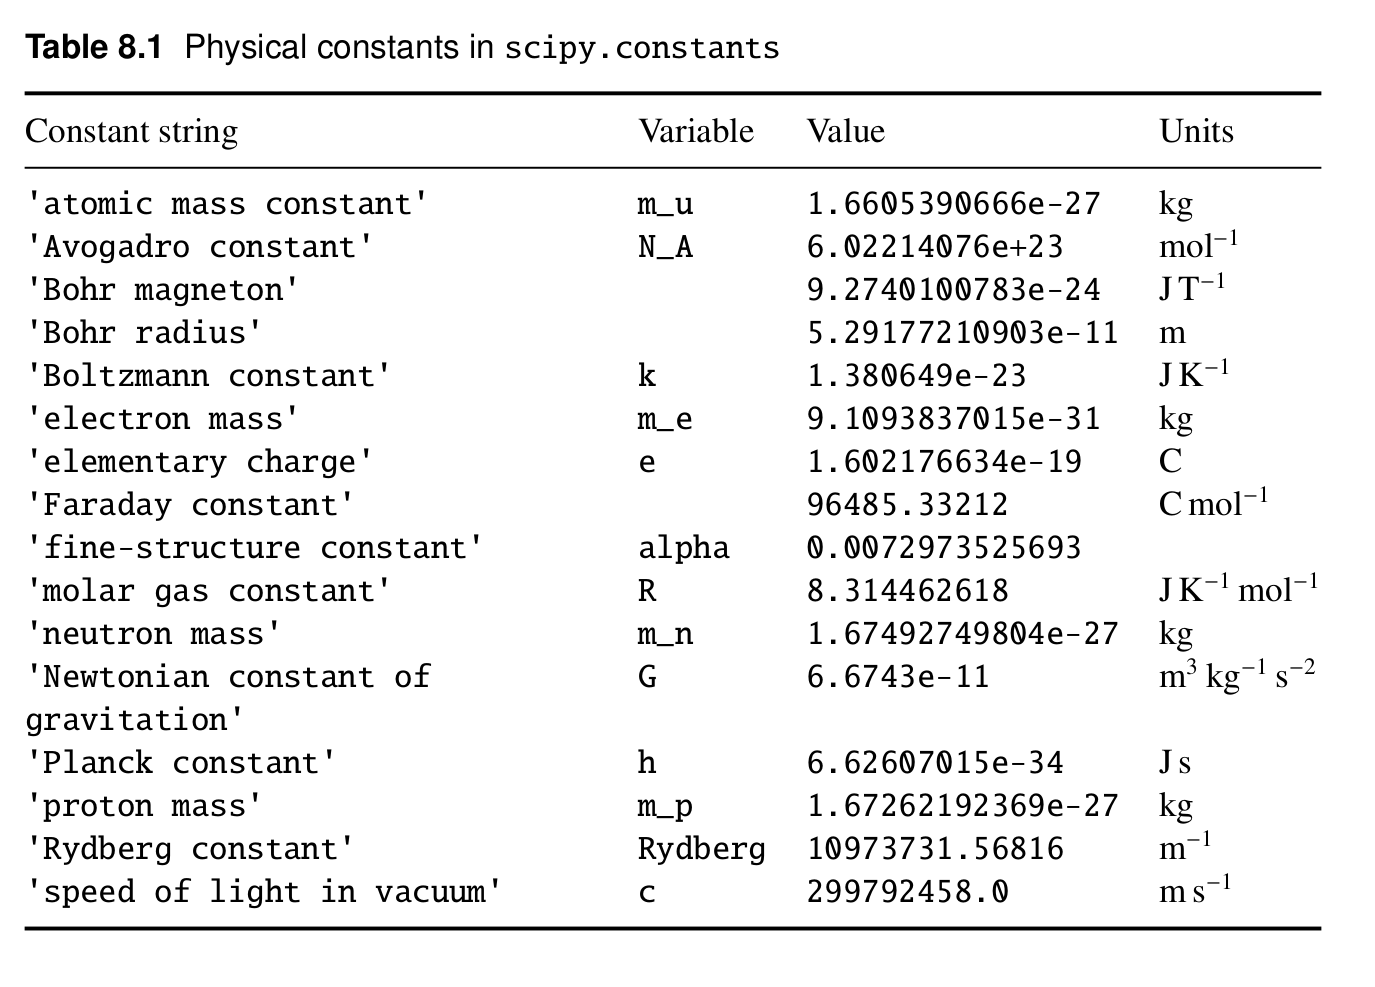

In [ ]:
#outra maneira de acessar
pc.c, pc.h, pc.N_A

(299792458.0, 6.62607015e-34, 6.02214076e+23)

*Exemplo E8.1* Constantes físicas com menor precisão.

In [ ]:
l = []
for const_ in pc.physical_constants:
    valor_ = pc.physical_constants[const_]

    l.append((const_, valor_[0], valor_[1], valor_[2], (valor_[2]/valor_[0])*1e6))

In [ ]:
dtype = [('nome', 'S50'),
         ('valor', 'f8'),
         ('unidade', 'S20'),
         ('incerteza_abs', 'f8'),
         ('incerteza_rel', 'f8')]

lista_constantes = np.array(l, dtype=dtype)

In [ ]:
lista_constantes.sort(order ='incerteza_rel')

In [ ]:
# List the 10 constants with the largest relative uncertainties
for rec in lista_constantes[-10:]:
    print(f"{rec['incerteza_rel']:.1f} -> {rec['nome'].decode()}")

90.0 -> tau Compton wavelength over 2 pi
90.0 -> tau mass energy equivalent in MeV
192.8 -> W to Z mass ratio
347.7 -> deuteron rms charge radius
428.2 -> proton mag. shielding correction
428.2 -> proton magn. shielding correction
828.5 -> shielding difference of t and p in HT
990.1 -> shielding difference of d and p in HD
1345.9 -> weak mixing angle
2258.1 -> proton rms charge radius


## Funções especiais

O submódulos `scipy.special` implementa várias. A lista completa está disponível em:

https://docs.scipy.org/doc/scipy/reference/special.html

### Funções de Airy

As funções de [Airy](https://en.wikipedia.org/wiki/Airy_function) de primeira $\text{Ai}(x)$ e segunda espécie $\text{Bi}(x)$ são as soluções da equação diferencial:

$$
\frac{d^2 y}{dx^2} - xy = 0
$$

In [ ]:
from scipy.special import airy

In [ ]:
#Ai, derivada de Ai, Bi, derivada de Bi
airy(0)

(0.3550280538878172,
 -0.2588194037928068,
 0.6149266274460007,
 0.4482883573538264)

In [ ]:
from scipy.special import ai_zeros

In [ ]:
?ai_zeros

In [ ]:
#duas primeiras raízes de Ai, Bi, e suas derivadas
ai_zeros(2)

(array([-2.33810741, -4.08794944]),
 array([-1.01879297, -3.24819758]),
 array([ 0.53565666, -0.41901548]),
 array([ 0.70121082, -0.80311137]))

In [ ]:
ai_zeros(2)[1][0]

-1.0187929716474715

In [ ]:
airy(ai_zeros(2)[0][0])

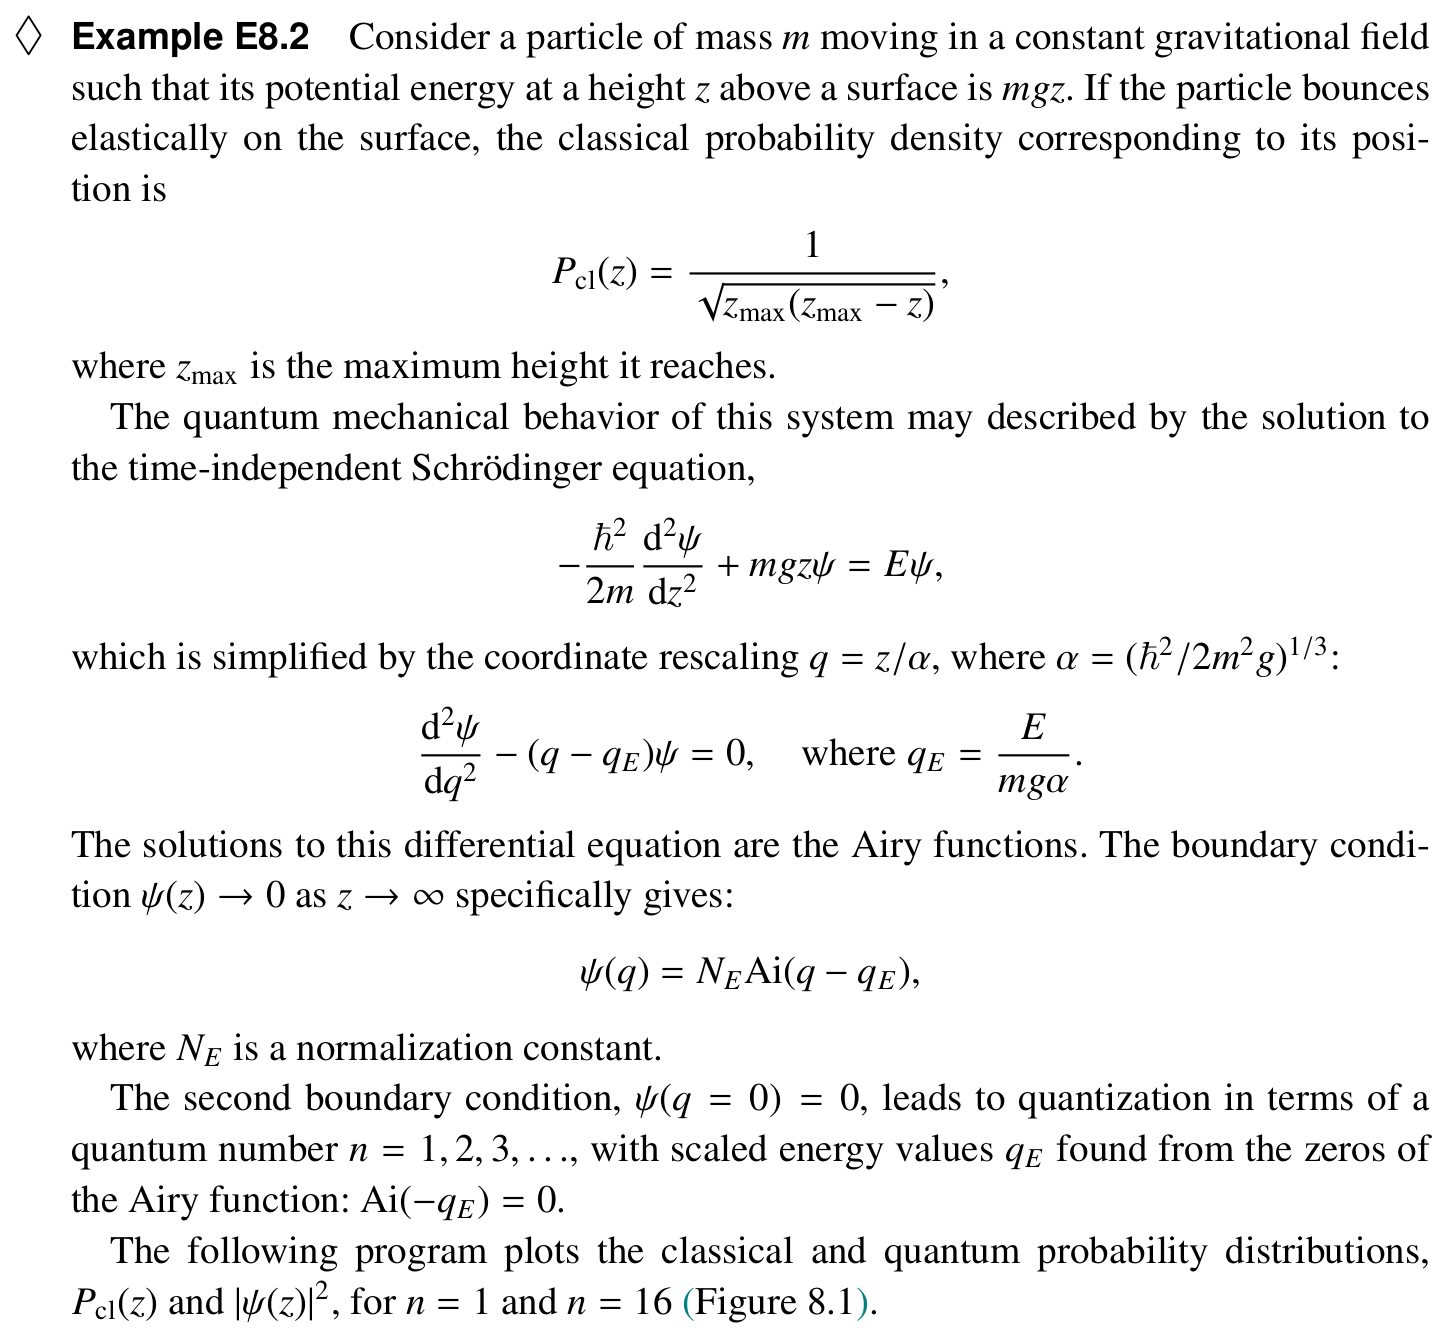

In [ ]:
from scipy.special import airy, ai_zeros


nmax = 50


# nmax zeros Ai(x)
a, _, _, _ = ai_zeros(nmax)
# a condição de contorno é Ai(-qE) = 0 em q=0, por isso:
qE = -a

def prob_cl(n):
    """
    Probabilidade via mecânica clássica.
    """
    return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))

def prob_qm(n, dq):
    """
    Probabilidade via mecânica quântica.
    """
    # função de onda
    psi, _, _, _ = airy(q-qE[n-1])
    # probabilidade
    P = psi**2
    # probabilidade normalizada
    P = P / (sum(P) * dq)
    return P

<ipython-input-27-7010467e9b11>:16: RuntimeWarning: invalid value encountered in sqrt
  return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


(0.0, 0.8)

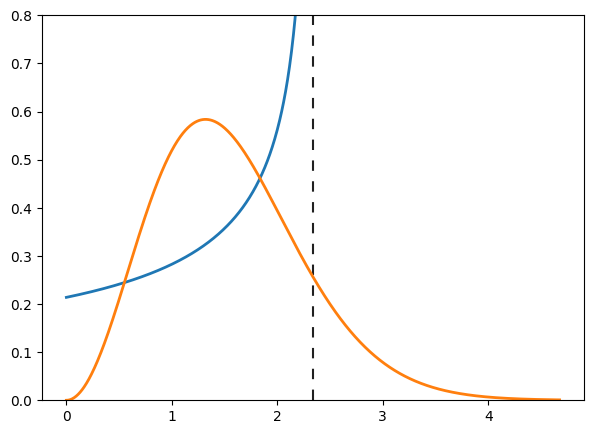

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

n = 1
q, dq = np.linspace(0, 2*qE[n-1], 1000, retstep=True)

ax.plot(q, prob_cl(n), label='Clássica', lw=2)
ax.axvline(qE[n-1],color='#202020',dashes=(5,5))
ax.plot(q, prob_qm(n,dq), label='Quântica', lw=2)
ax.set_ylim(0,0.8)

<ipython-input-27-7010467e9b11>:16: RuntimeWarning: invalid value encountered in sqrt
  return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


(0.0, 0.8)

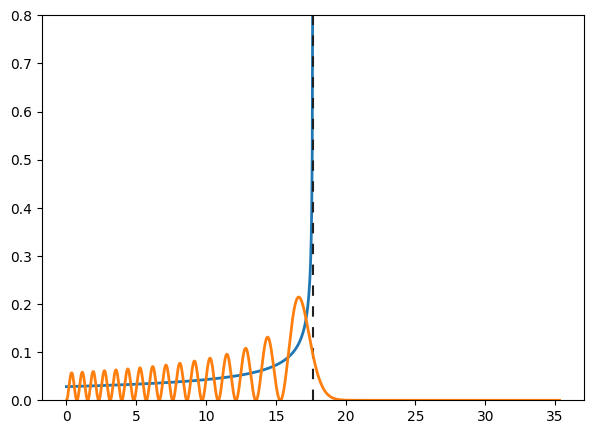

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

n = 16
q, dq = np.linspace(0, 2*qE[n-1], 1000, retstep=True)
ax.plot(q, prob_cl(n), label='Clássica', lw=2)
ax.axvline(qE[n-1],color='#202020',dashes=(5,5))
ax.plot(q, prob_qm(n,dq), label='Quântica', lw=2)
ax.set_ylim(0,0.8)

<ipython-input-27-7010467e9b11>:16: RuntimeWarning: invalid value encountered in sqrt
  return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


(0.0, 0.8)

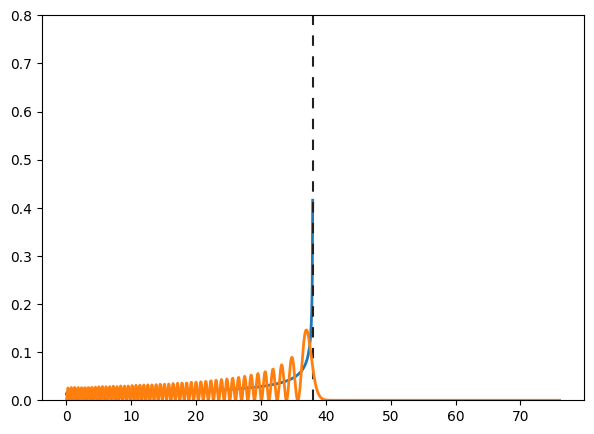

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

n = 50
q, dq = np.linspace(0, 2*qE[n-1], 1000, retstep=True)
ax.plot(q, prob_cl(n), label='Clássica', lw=2)
ax.axvline(qE[n-1],color='#202020',dashes=(5,5))
ax.plot(q, prob_qm(n,dq), label='Quântica', lw=2)
ax.set_ylim(0,0.8)

### Funções de Bessel

As funções de Bessel de primeira $J_n(x)$ e segunda $Y_n(x)$ espécie são as soluções da equação de diferencial:

$$
\frac{d^2 y}{dx^2} + \frac{1}{c}\frac{d y}{d x} + (1-n^2/x^2)y=0
$$
com $n=0,1,2,\dots$.

In [ ]:
from scipy.special import jn, jn_zeros, yn, yn_zeros

In [ ]:
#n=0,x=1
jn(0,1)

0.7651976865579666

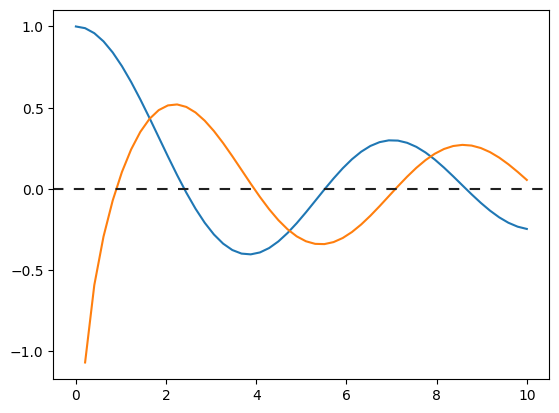

In [ ]:
x = np.linspace(0,10)
plt.plot(x,jn(0,x))
plt.plot(x,yn(0,x))

plt.axhline(0,color='#202020',dashes=(5,5))

In [ ]:
yn_zeros(0,4)

array([ 0.89357697,  3.95767842,  7.08605106, 10.22234504])

In [ ]:
jn_zeros(0,3)

array([2.40482556, 5.52007811, 8.65372791])

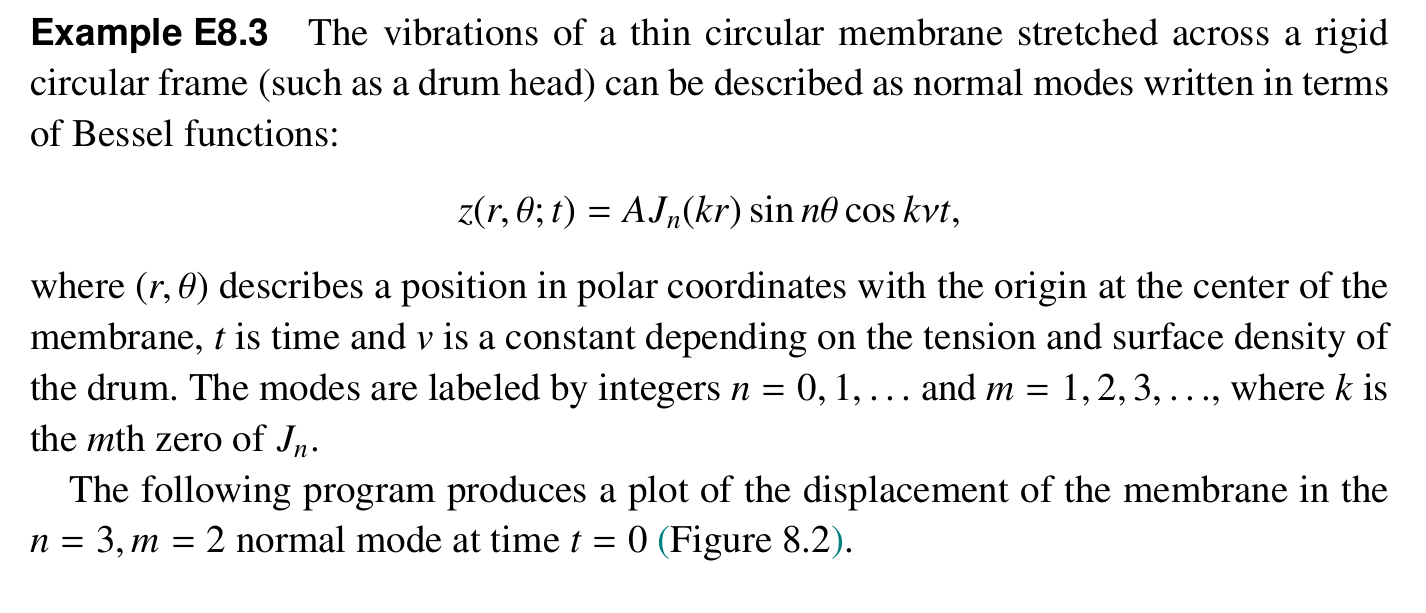

In [ ]:
mmax = 50

def deslocamento(n, m, r, theta, t=0, nu=1):
    """
    Deslocamento de uma membrana circular de raio 1.
    """

    k = jn_zeros(n, mmax+1)[m]
    return jn(n, r*k)*np.sin(n*theta)*np.cos(k*nu*t)

In [ ]:
deslocamento(n=3, m=2, r=0.122, theta=2)

-0.019855793927957995

In [ ]:
r = np.linspace(0, 1, 100)
theta = np.linspace(0, 2 * np.pi, 100)

r, theta = np.meshgrid(r,theta)
z = deslocamento(n=3, m=2, r=r, theta=theta)

In [ ]:
x = r*np.cos(theta)
y = r*np.sin(theta)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.5, 'y')

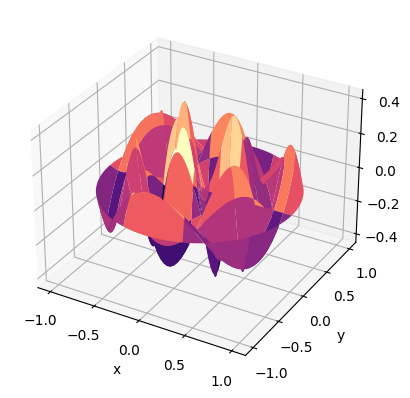

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(x, y, z,
                  rstride=10,
                  cstride=10,
                  cmap='magma'
                  )
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
mmax = 50

def deslocamento_xyz(n, m, t=0,nu=1):
    """
    Deslocamento de uma membrana circular de raio 1.
    """

    k = jn_zeros(n, mmax+1)[m]

    r = np.linspace(0, 1, 100)
    theta = np.linspace(0, 2 * np.pi, 100)

    r, theta = np.meshgrid(r,theta)

    x = r*np.cos(theta)
    y = r*np.sin(theta)

    z = jn(n, r*k)*np.sin(n*theta)*np.cos(k*nu*t)

    return x,y,z

Text(0.5, 0.5, 'y')

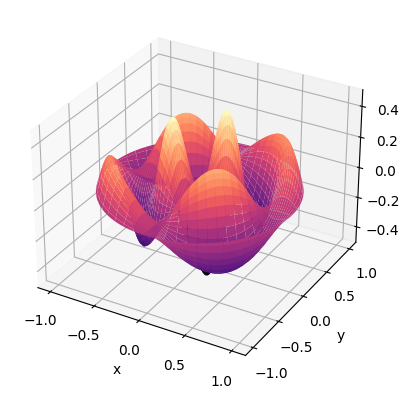

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(*deslocamento_xyz(2,2),
                #   rstride=10,
                #   cstride=10,
                  cmap='magma'
                  )
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(n=(1,10,1), m=(1,10,1), t=(0,1,0.025))
def plot(n=0, m=1, t=0):
    f, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_surface(*deslocamento_xyz(n,m,t),
                    cmap='magma'
                    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(-0.5,0.5)
    plt.close(f)
    return f

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

In [ ]:
@interact(n=(1,10,1), m=(1,10,1), t=(0,1,0.025))
def plot(n=0, m=1, t=0):
    f, ax = plt.subplots(figsize=(5,5))
    ax.contourf(*deslocamento_xyz(n,m,t),
                    cmap='magma',vmin=-0.5,vmax=0.5,
                    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.set_zlim(-0.5,0.5)
    plt.close(f)
    return f

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

### Função Gama

A função gama é definida como a integral

$$
\Gamma(x) = \int_0^\infty t^{x-1} e^{-t} dt
$$

para $x>0$.

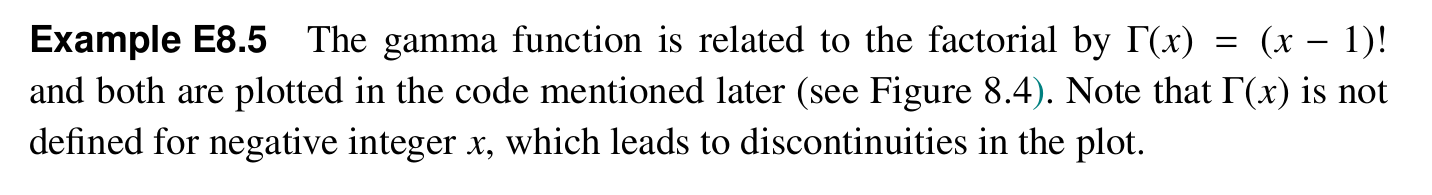

In [ ]:
from scipy.special import gamma, factorial

In [ ]:
gamma(3), gamma(4), gamma(5)

(2.0, 6.0, 24.0)

In [ ]:
factorial(2), factorial(3), factorial(4)

(2.0, 6.0, 24.0)

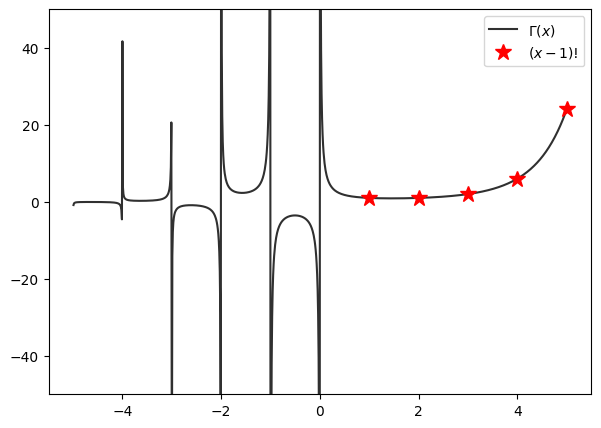

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

x = np.linspace(-5, 5, 1000)
g_x = gamma(x)

ax.plot(x, g_x, ls='-', c='#303030', label='$\Gamma(x)$')

x = np.arange(1,6,1)
f_x = factorial(x-1)

ax.plot(x, f_x, marker='*', markersize=12, markeredgecolor='r',
           markerfacecolor='r', ls='',c='r', label='$(x-1)!$')

ax.set_ylim(-50,50)
ax.legend()

### Função Beta

A função beta é definida via integral:

$$
B(a,b) = \int_0^1 t^{a-1} (1-t)^{b-1} dt
$$

com $a>0$ e $\beta>0$ sendo parâmetros da função. A função beta tem relação com a gama:

$$
B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$

In [ ]:
from scipy.special import beta

In [ ]:
beta(1,2)

0.5

### Integrais Elípticas

Essas funções especiais são definidas via

$$
K(m) = \int_0^{\pi/2} \frac{d\theta}{\sqrt{1-m \sin^2\theta}}
$$

$$
E(m) = \int_0^{\pi/2} \sqrt{1-m \sin^2\theta}\,d\theta
$$

### Integrais Elípticas Incompletas

$$
K(\phi, m) = \int_0^{\phi} \frac{d\theta}{\sqrt{1-m \sin^2\theta}}
$$

$$
E(\phi,m) = \int_0^{\phi} \sqrt{1-m \sin^2\theta}\,d\theta
$$

Todas definidas para $m>0$.

In [ ]:
from scipy.special import ellipk, ellipe, ellipkinc, ellipeinc

In [ ]:
ellipk(1),ellipkinc(0.1,1),ellipkinc(np.pi/2.,1)

(inf, 0.10016708454748019, inf)

In [ ]:
ellipe(1),ellipeinc(0.1,1),ellipeinc(np.pi/2.,1)

(1.0, 0.09983341664682815, 1.0)

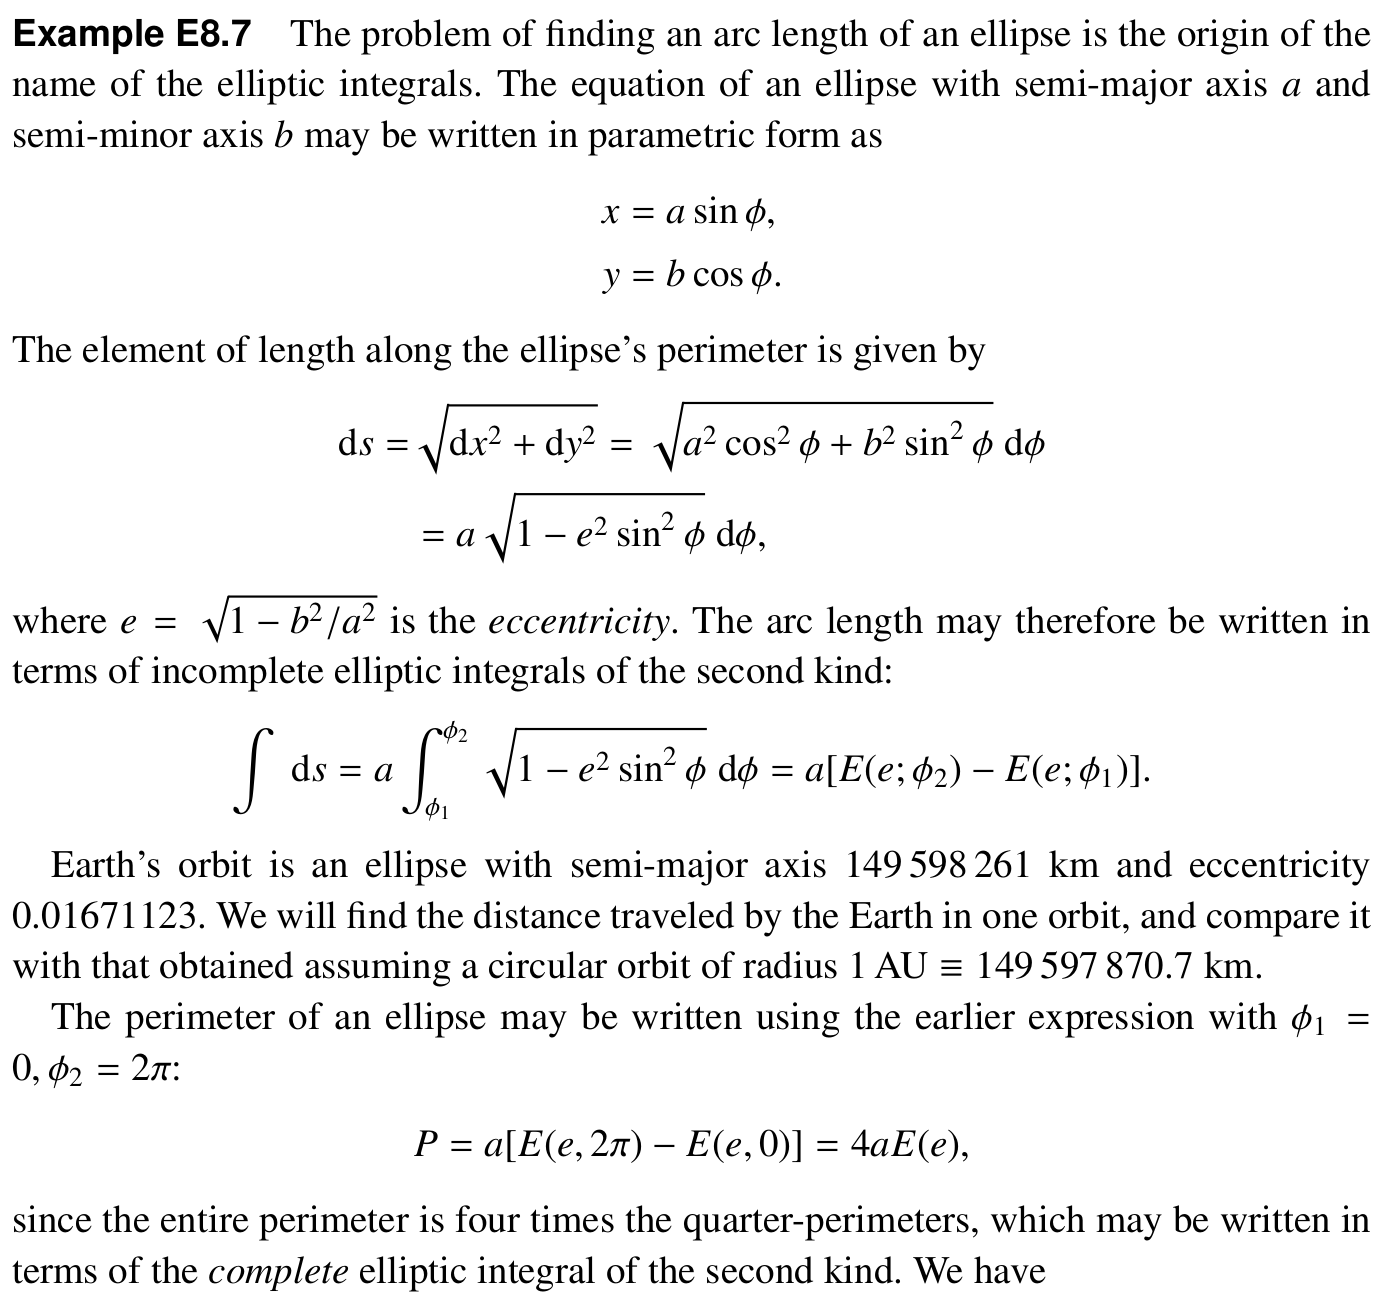

In [ ]:
#semi-eixo maior e excentricidade
a, e  = 149598261, 0.01671123
pe = 4 * a * ellipe(e*e)
pe

939887967.9740784

In [ ]:
AU = 149597870.7
pc = 2 * np.pi * AU
pc

939951143.1675915

In [ ]:
((pc - pe) / pe) * 100

0.006721566363830514

### Função Erro e funções relacionadas

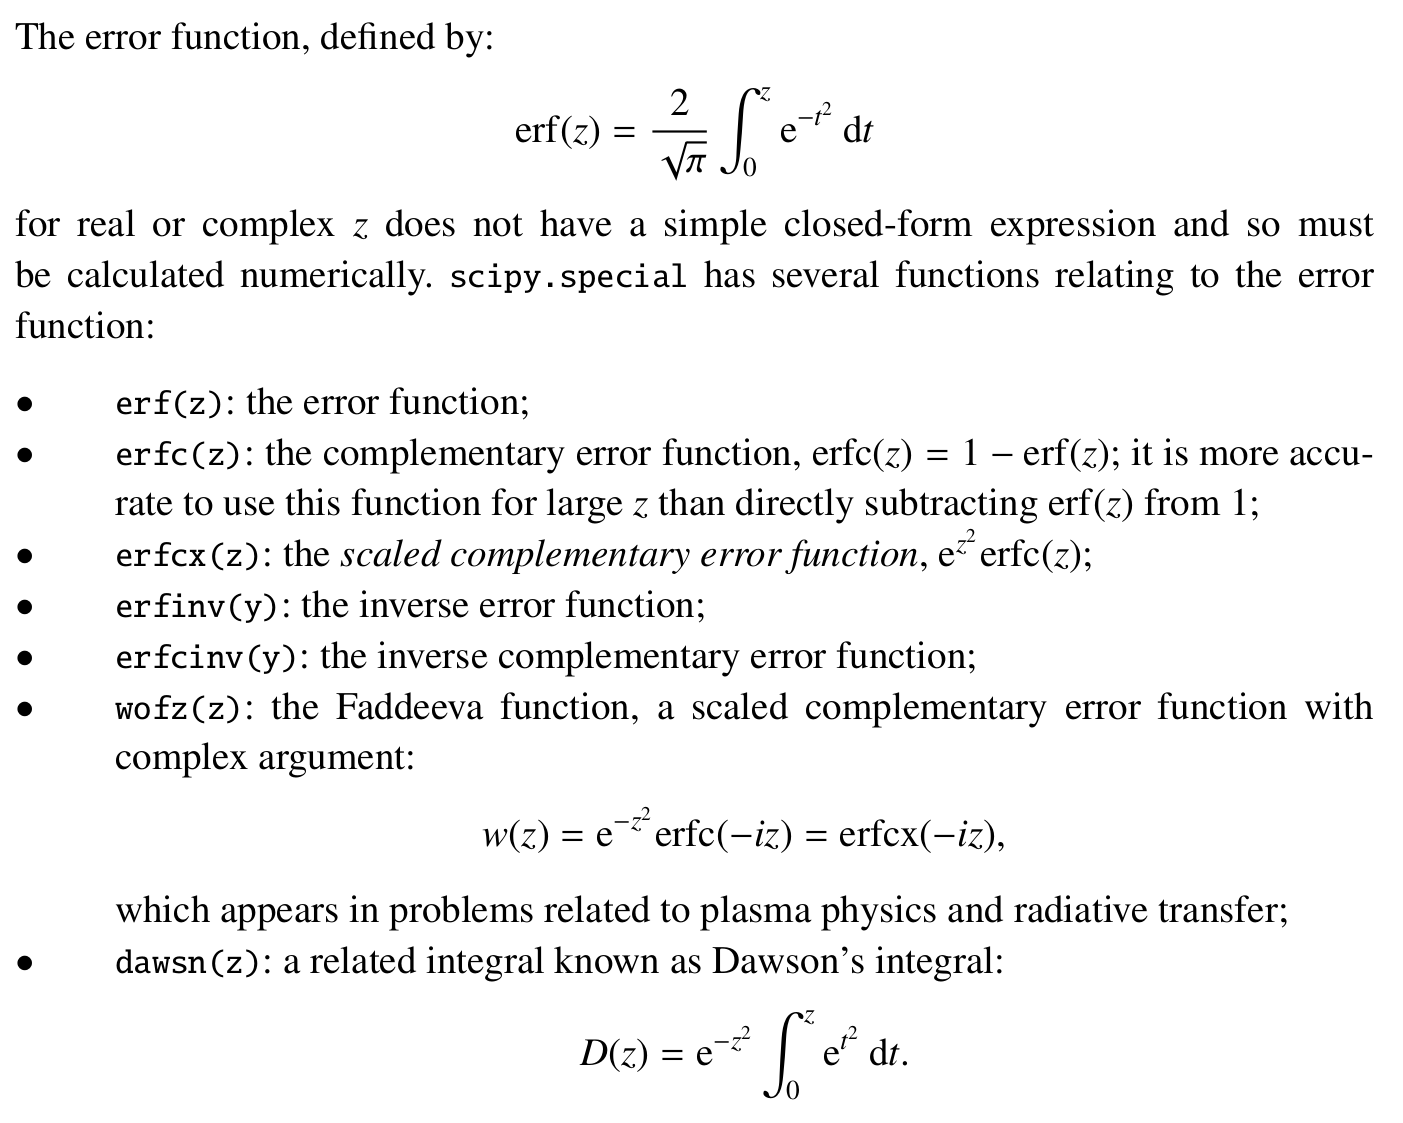

In [ ]:
from scipy.special import erf, erfc

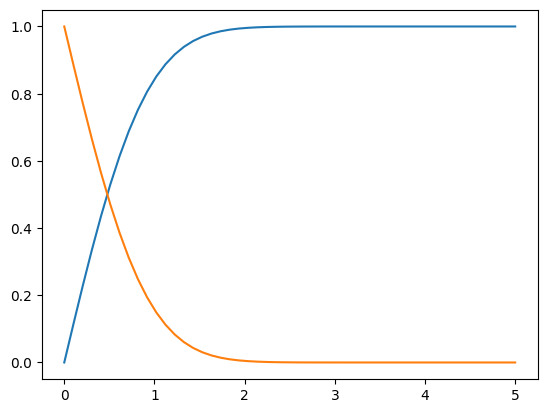

In [ ]:
x = np.linspace(0,5)

plt.plot(x,erf(x))
plt.plot(x,erfc(x))

In [ ]:
erf(2)

0.9953222650189527

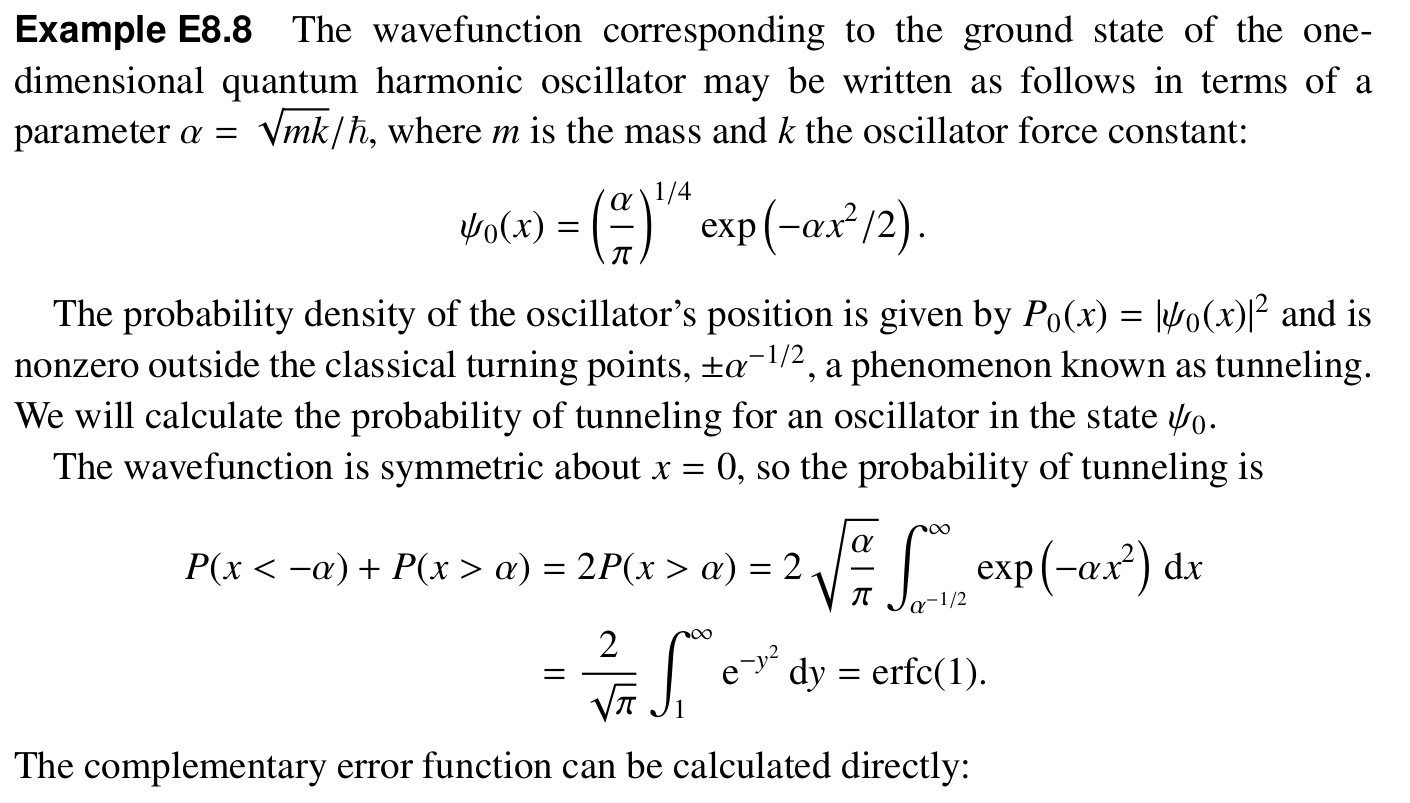

In [ ]:
erfc(1)

0.15729920705028516

### Coeficientes binomiais e integrais exponenciais

$$
^nC_k = \frac{n!}{k!(n-k)!}
$$

é implementado pela função `binom(n,k)`

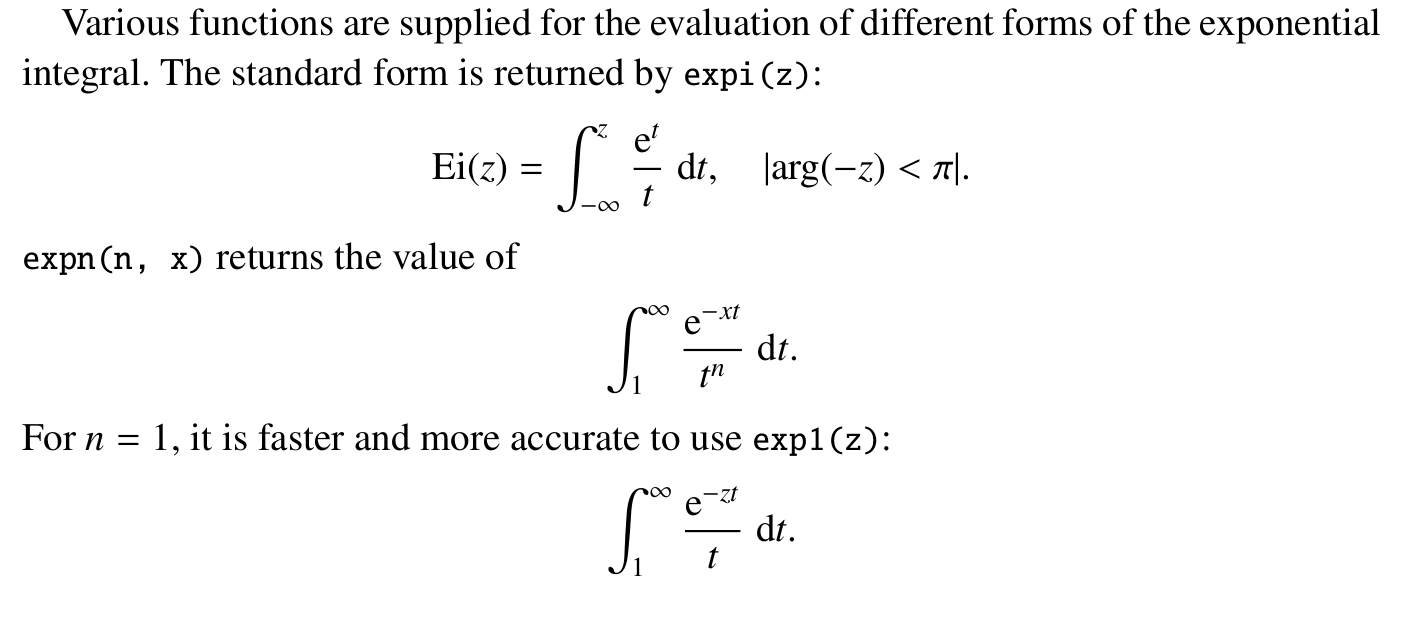

In [ ]:
from scipy.special import binom, expi, expn

In [ ]:
binom(5,3),factorial(5)/(factorial(3)*factorial(5-3))

(10.0, 10.0)

In [ ]:
expi(1),expn(1,1)

(1.8951178163559368, 0.2193839343955205)

### Polinômios ortogonais e harmônicos esféricos

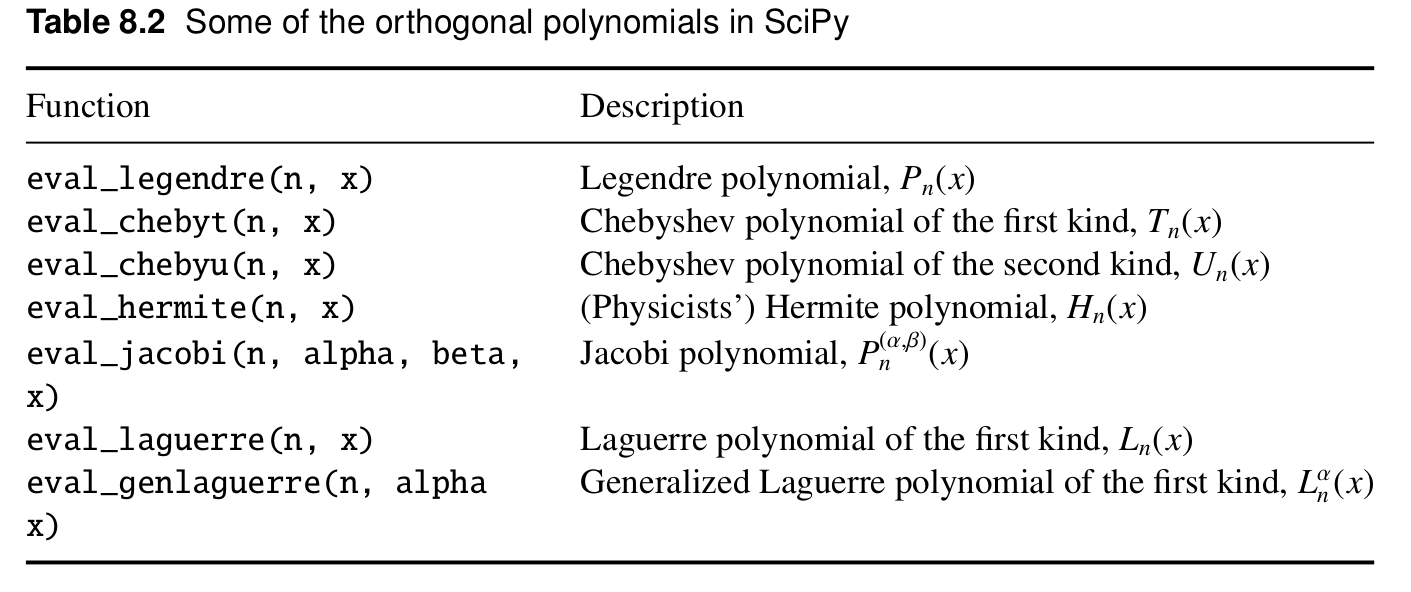

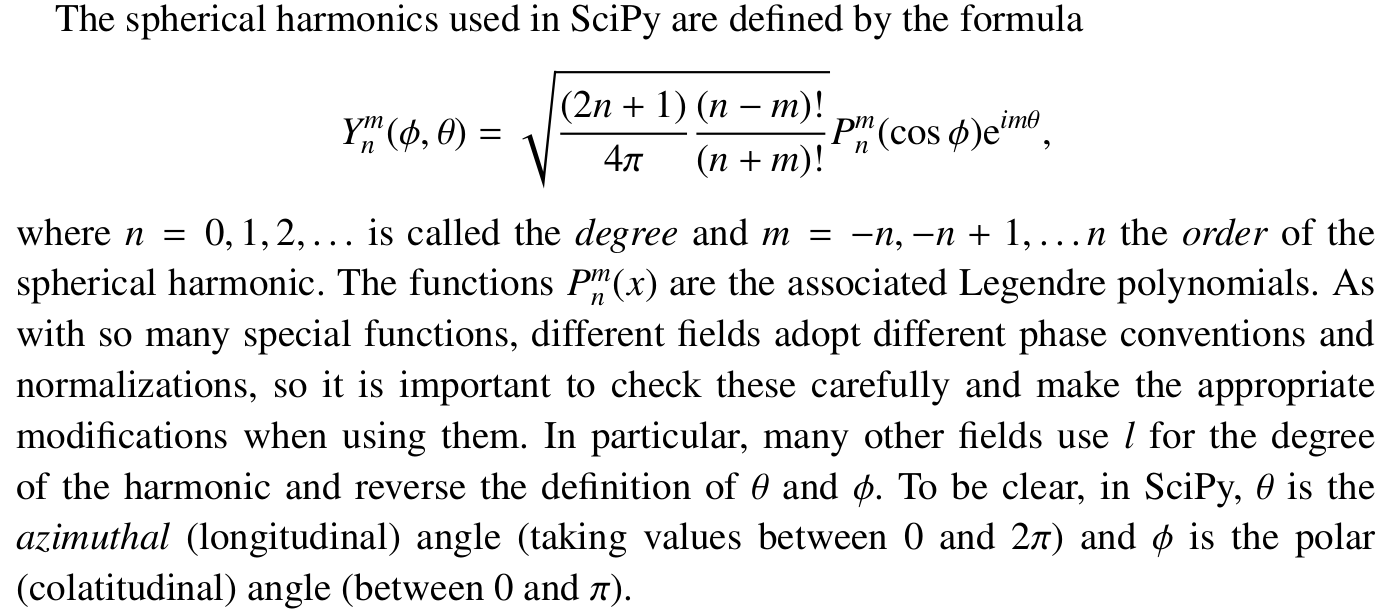

Estão disponíveis em:

```
scipy.special.sph_harm(m, n, theta, phi)
```

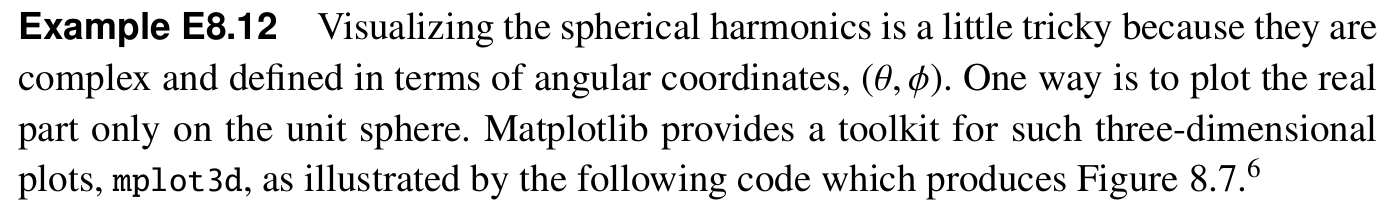

In [ ]:
from scipy.special import sph_harm
from matplotlib import cm, colors

In [ ]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

In [ ]:
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

In [ ]:
m, l = 2, 3

In [ ]:
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

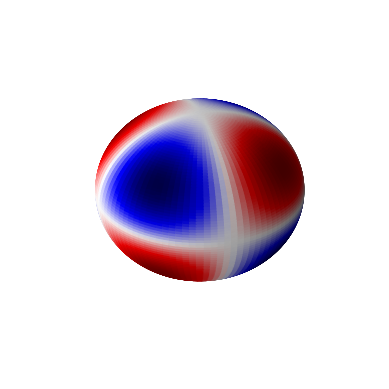

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(x, y, z,
                rstride=1,
                cstride=1,
                facecolors=cm.seismic(fcolors)
                )
ax.set_axis_off()

In [ ]:
@interact(n=(1,10,1), m=(-10,10,1))
def plot(n=1, m=1):
    f, ax = plt.subplots(subplot_kw={'projection': '3d'})

    fcolors = sph_harm(m, n, theta, phi).real
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)

    ax.plot_surface(x, y, z,
                    rstride=1,
                    cstride=1,
                    facecolors=cm.seismic(fcolors)
                    )
    ax.set_axis_off()
    # ax.set_zlim(-0.5,0.5)
    plt.close(f)
    return f

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …